<a href="https://colab.research.google.com/github/duckbillLvr/software-lecture/blob/main/lecture4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install finterstellar

     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
import finterstellar as fs

1. 핀터스텔라 라이브러리의 fn_single함수를 이용하여 코스트코의 재무제표를 불러온다.

In [4]:
df = fs.fn_single(otp='16474954571099712210', symbol='COST', window='T') # symbol: 데이터 산출 기준, window: 분기데이터=Q, 분기별을 합쳐서 1년치 트레일링 데이터 호출=T
df.tail(3)

,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,Shares,...,Long Term Liabilities,Total Liabilities,Shareholders Equity,Depreciation,Operating Cash Flow,Capital Expenditure,Investing cash flow,Dividends,Financing cash flow,Price
2021-08-31,1.979980e+11,1.726410e+11,2.535700e+10,1.804900e+10,5.278000e+09,5.061000e+09,11.40,9.300000e+09,5.278000e+09,443000000.0,...,1.174900e+10,4.119000e+10,1.756400e+10,2.002000e+09,9.644000e+09,-2.695000e+09,-4.196000e+09,-5.438000e+09,-6.207000e+09,455.49
2021-11-30,2.035920e+11,1.775150e+11,2.607700e+10,1.867100e+10,5.631000e+09,5.434000e+09,12.24,9.425000e+09,5.631000e+09,443000000.0,...,1.180700e+10,4.514900e+10,1.846300e+10,2.029000e+09,1.286400e+10,-3.177000e+09,-4.753000e+09,-1.358000e+09,-2.396000e+09,539.38
2022-02-28,2.102190e+11,1.836170e+11,2.660200e+10,1.911400e+10,7.443000e+09,5.513000e+09,12.41,9.549000e+09,7.443000e+09,444000000.0,...,1.155700e+10,4.310200e+10,1.941800e+10,2.071000e+09,9.932000e+09,-3.900000e+09,-3.891000e+09,-1.358000e+09,-2.805000e+09,519.25


2. 가져온 데이터를 확인한다. (columns 파라미터 사용)

In [5]:
df.columns

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

#### 3. 이익 대비 저평가 종목, PER를 계산하고 코스트코의 PER추이를 차트로 계산
- PER = Price / EPS ( 주가 / 주당순이익 ) // PER이 낮을 수록 좋은 기업  

In [6]:
df['PER'] = df['Price'] / df['EPS']

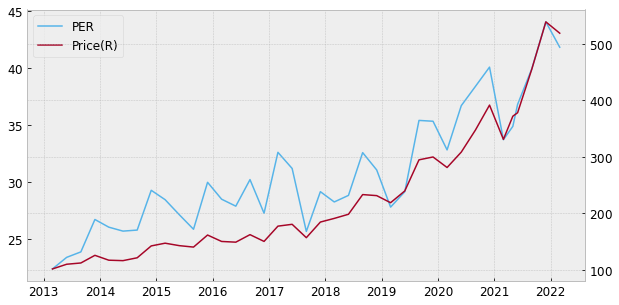

In [7]:
fs.draw_chart(df, left='PER', right='Price')

In [8]:
df.columns # PER항목이 생긴것을 확인 할수 있다.

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price',
       'PER'],
      dtype='object')

4. 밴드차트를 그려본다.
- PER와 같이 재무지표와 가격이 결합된 지표를 주가배수(Price Multiple)이라고 한다.

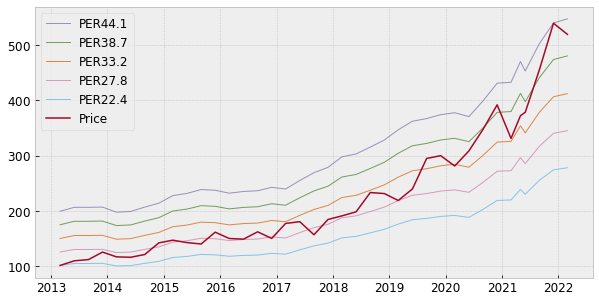

In [9]:
fs.draw_price_multiple_band(df, multiple='PER', acct='EPS')

5. 전체 상장 종목의 재무정보 데이터 불러오기

- 이익 대비 저평가 종목 : PER를 이용해 투자를 하는 가장 직관적인 방법은 PER가 낮은 종목을 사서 기다리는 것이다.

- fn_consolidated() 함수를 이용하면 여러 기업의 재무 정보를 모아서 분기별로 조회할 수 있다.

In [10]:
df = fs.fn_consolidated(otp='16474954571099712210', term='2020Q3', vol=100000, study='Y') # term: 조회 대상 분기 값, vol: 일평균 거래량
df.head(3)

2020Q3... For Study. Freezed at the end of July 2021. OK


,term,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,...,Financing Cash Flow,Price,Price_M1,Price_M2,Price_M3,name,name_kr,sector,industry,avg_volume
symbol,,,,,,,,,,,,,,,,,,,,,
A,2020Q3,5223.000,2437.0,2786.000,1494.000,797.000,691.000,2.26,1105.000,797.000,...,49.00,100.94,102.09,116.90,118.49,Agilent Technologies Inc,애질런트 테크놀로지스,Healthcare,Diagnostics & Research,1362200
AA,2020Q3,9330.000,8043.0,1287.000,213.000,-23.000,-469.000,-2.53,643.000,-23.000,...,484.00,11.63,12.92,19.90,23.05,Alcoa Corp,알코아,Basic Materials,Aluminum,5513100
AAIC,2020Q3,64.772,0.0,64.772,12.559,11.162,-54.799,-1.52,62.763,52.213,...,-3220.76,2.84,2.46,3.21,3.78,Arlington Asset Investment Corp Class A,알링턴 에셋 인베스트먼트 Class A,Real Estate,Reit Mortgage,166900


In [11]:
df.columns

Index(['term', 'Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing Cash Flow', 'Dividend', 'Financing Cash Flow', 'Price',
       'Price_M1', 'Price_M2', 'Price_M3', 'name', 'name_kr', 'sector',
       'industry', 'avg_volume'],
      dtype='object')

In [12]:
df['PER'] = df['Price'] / df['EPS']
df['PER']

symbol
A       44.663717
AA      -4.596838
AAIC    -1.868421
AAL     -0.887365
AAOI    -2.877238
          ...    
ZUMZ    11.401639
ZUO    -14.985507
ZVO     -7.547170
ZYME   -10.017204
ZYXI    56.290323
Name: PER, Length: 3032, dtype: float64

### 백테스트 전략
- 분기별로 PER 값이 낮은 순서대로 상위 30개 종목에 투자하는 전략 테스트

> 2010년 1분기 ~ 2021년 1분기까지 완료

In [13]:
terms = fs.set_terms(trade_start='2010Q1', trade_end='2021Q1')
terms

Index(['2009Q4', '2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2',
       '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
       '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4',
       '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3',
       '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2',
       '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1',
       '2020Q2', '2020Q3', '2020Q4'],
      dtype='object')

In [14]:
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16474954571099712210', term=t)
s = {}
signal = {}
for t in terms:
  data[t]['PER'] = data[t]['Price'] / data[t]['EPS']
  s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
  signal[t] = list(s[t].index)

2009Q4...OK
2010Q1...OK
2010Q2...OK
2010Q3...OK
2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [15]:
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 11.00%
Accumulated return: 215.41%
Investment period: 11.0yrs
Sharpe ratio: 0.82
MDD: -47.90%


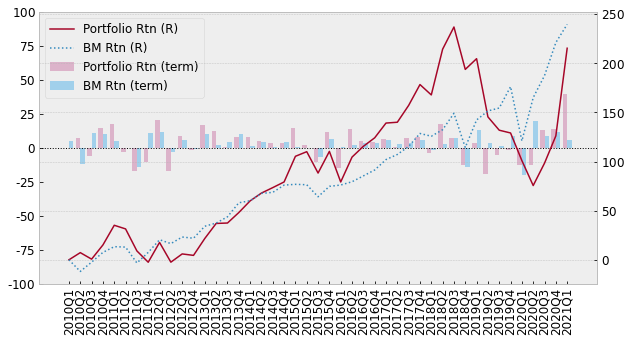

In [16]:
fs.draw_return(df)

### 장부 가치 대비 저평가 종목, PBR(주가순자산비율)
> PBR = $\frac{주가}{주당순자산(BPS)}$  BPS(주당순자산) = $\frac{자본}{주식수}$

PBR은 기업이 가진 순자산에 대해 시장이 매기는 가치다.
- PBR은 투자의 안정성을 표시하는 대표적 지표

In [17]:
df = fs.fn_single(otp='16474954571099712210', symbol='JBLU', window='T') # 제트블루의 재무 데이터

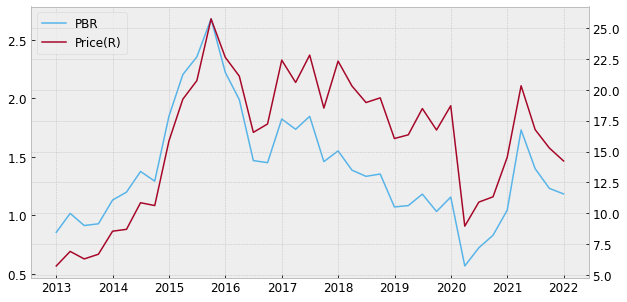

In [18]:
df['BPS'] = df['Shareholders Equity'] / df['Shares']
df['PBR'] = df['Price'] / df['BPS']
fs.draw_chart(df, left='PBR', right='Price')

- PBR 밴드 차트

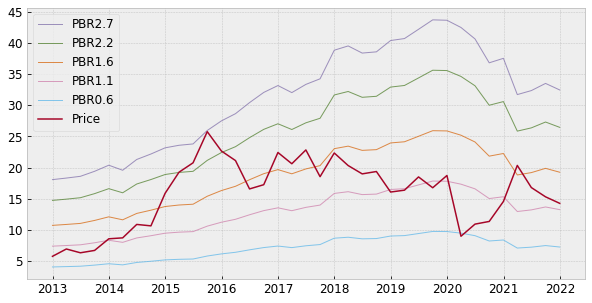

In [19]:
fs.draw_price_multiple_band(df, multiple='PBR', acct='BPS') # PBR 밴드 그려보기

### PBR 백테스팅
- 분기별로 PBR 값이 낮은 순서대로 상위 30개 종목에 투자하는 전략을 테스트

> 2010년 1분기 ~ 2021년 1분기까지 완료

In [20]:
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16474954571099712210', term=t)
s = {}
signal = {}
for t in terms:
  data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
  data[t]['PBR'] = data[t]['Price'] / data[t]['BPS']
  s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=2, n=30, asc=True)
  signal[t] = list(s[t].index)

2009Q4...OK
2010Q1...OK
2010Q2...OK
2010Q3...OK
2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [23]:
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 30.57%
Accumulated return: 1784.12%
Investment period: 11.0yrs
Sharpe ratio: 4.71
MDD: -34.39%


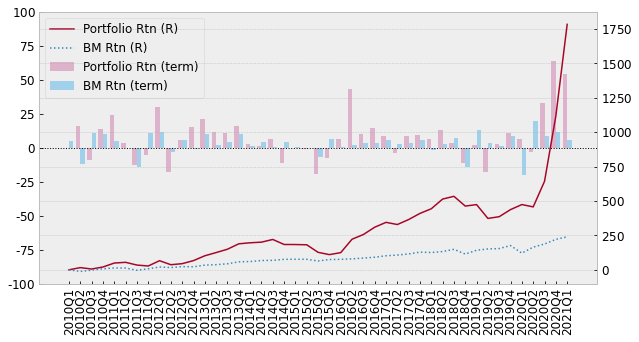

In [24]:
fs.draw_return(df)